<a href="https://colab.research.google.com/github/semoona/elevvo-ml-internship-2-weeks-/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# in order to split the dataset importing train test split
from sklearn.model_selection import train_test_split

# to build the regression model importing linear regression
from sklearn.linear_model import LinearRegression
#to predict and evaluate importing mean square and r2 score

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# importing the data set
df = pd.read_csv('/content/StudentPerformanceFactors.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# now that we know what are aware what our datset looks like we are going to drop any missing values
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# we are going to drop the columns with null values
df.dropna(inplace=True)
x = df.drop(["Exam_Score",'Attendance','Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Sleep_Hours','Previous_Scores', 'Motivation_Level','Internet_Access','Tutoring_Sessions','Family_Income','Teacher_Quality', 'School_Type','Peer_Influence','Physical_Activity','Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Gender'], axis=1)
y = df["Exam_Score"]
# Drop rows with missing values in critical columns
df = df[['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Exam_Score']].dropna()

# Optional: remove outliers or unrealistic values
df = df[(df['Hours_Studied'] > 0) & (df['Sleep_Hours'] > 0)]


In [ ]:
df.head()

,Hours_Studied,Sleep_Hours,Attendance,Exam_Score
0,23,7,84,67
1,19,8,64,61
2,24,7,98,74
3,29,8,89,71
4,19,6,92,70


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Sleep_Hours,0
Attendance,0
Exam_Score,0


In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Sleep_Hours,0
Attendance,0
Exam_Score,0


In [ ]:
# since no missing or null or duolicate values are found we are going to focus on next part the visualization

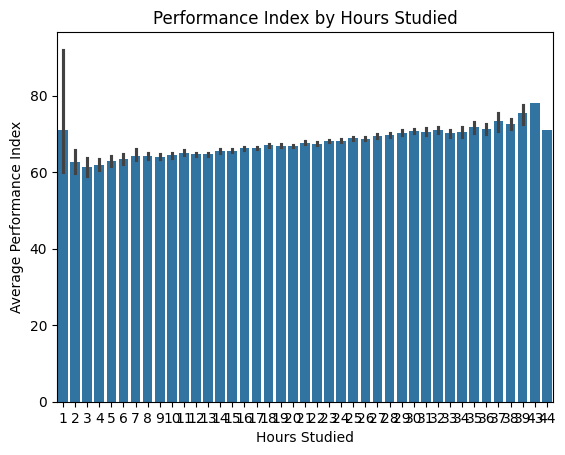

In [ ]:
# visualizing between hour studied and performance index
sns.barplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Performance Index by Hours Studied')
plt.show()

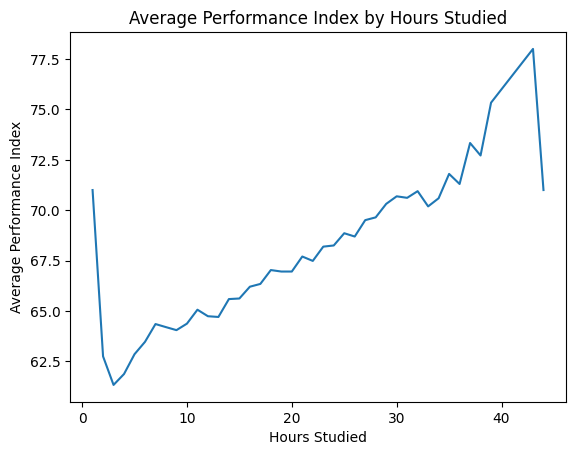

In [ ]:
# Visualize the average performance index across different levels of the "Hours Studied" variable
avg_performance_by_hours = df.groupby('Hours_Studied')['Exam_Score'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')
plt.show()

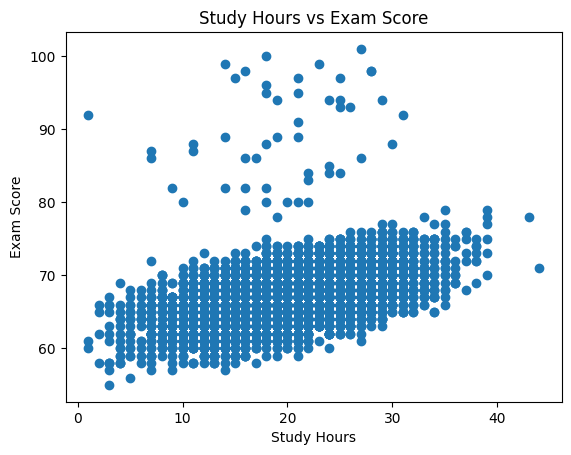

In [ ]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.show()

In [ ]:
# from these graphs we can see there is clear correlation between the hours studied and performnace of the student
# its a positive relation meaning more hour studied results in greater performnace


In [ ]:
# now we spilt data into test and train
# Splitting data into Indipendent and Dependent Variable
X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

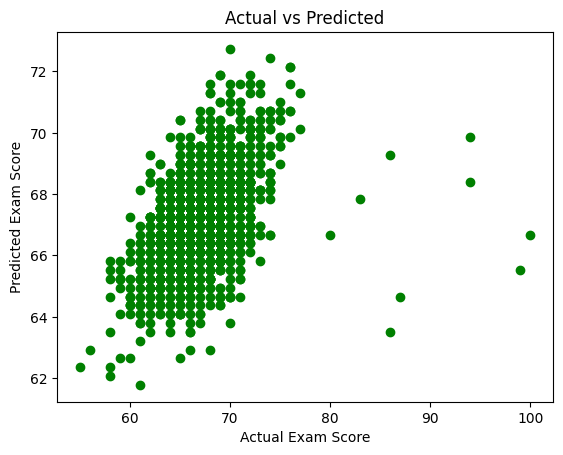

MSE: 12.35
R² Score: 0.21


In [ ]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted')
plt.show()

print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')


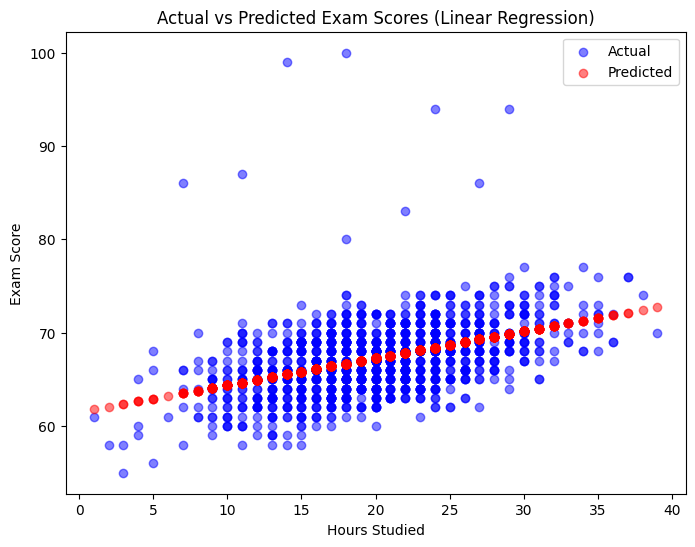

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Exam Scores (Linear Regression)')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test)
y_poly_pred = poly_model.predict(X_test_poly)

print(f'Polynomial R² Score: {r2_score(y_test, y_poly_pred):.2f}')


Polynomial R² Score: 0.21


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression:")
print(f"  MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"  R² Score: {r2_score(y_test, y_pred):.2f}")

print("\nPolynomial Regression:")
print(f"  MSE: {mean_squared_error(y_test, y_poly_pred):.2f}")
print(f"  R² Score: {r2_score(y_test, y_poly_pred):.2f}")


Linear Regression:
  MSE: 12.35
  R² Score: 0.21

Polynomial Regression:
  MSE: 12.35
  R² Score: 0.21
